# Clustering: Extraindo Padrões de Dados

##### https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download

### Importação dos Dados

In [1]:
import pandas as pd

df = pd.read_csv("cc_general.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Organização de Features

In [2]:
df_organized = df.drop(columns=["CUST_ID", "TENURE"], axis=1)
df_organized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


### Organização de Valores Ausentes/Problemáticos

In [3]:
df_organized.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [4]:
df_organized.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [5]:
df_organized.fillna(df_organized.median(), inplace=True)
df_organized

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


### Normalização | Padronização dos Dados

In [6]:
from sklearn.preprocessing import Normalizer

df_normalized = Normalizer().fit_transform(df_organized.values)
df_normalized

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

### Aplicação do Modelo de Clusterização (KMeans)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_prediction = kmeans.fit(df_normalized)
y_prediction

KMeans(n_clusters=5, n_init=10)

### Análise do Agrupamento - Valor de Silhouette


![Silhouette Score Formula](https://www.oreilly.com/api/v2/epubs/9781786469878/files/assets/7a6c9f09-21c9-4d4d-807c-8a9918223f01.png)


##### É uma métrica usada para calcular a qualidade de uma técnica de agrupamento. Seu valor varia de -1 a 1. Onde "1" significa que os clusters estão bem separados uns dos outros e claramente distintos.

In [8]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(df_normalized, labels, metric="euclidean")
silhouette

0.36454411415175675

### Análise do Agrupamento - Índice de Davies-Bouldin


![Davies-Bouldin Score Formula](https://he-s3.s3.amazonaws.com/media/uploads/1c3b995.png)

##### É definido como a medida de similaridade média de cada cluster com seu cluster mais semelhante, onde a similaridade é a razão entre as distâncias dentro do cluster e as distâncias entre os clusters. Assim, clusters mais distantes e menos dispersos resultarão em uma pontuação melhor.

##### É definido como uma razão entre a dispersão do cluster e a separação do cluster e um valor menor significará que o agrupamento é melhor.

![Davies-Bouldin Score Formula](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/exerc%C3%ADcios/aula4/aula4-ex3-img1.png)
##### A fórmula acima é utilizada para medir a similaridade entre dois clusters i e j. Desse modo, sabe-se que "s" mede a compactação dos clusters e "d" mede a separação entre eles.



In [9]:
from sklearn import metrics

labels = kmeans.labels_
davies_bouldin = metrics.davies_bouldin_score(df_normalized, labels)
davies_bouldin

1.0759640420985468

### Análise do Agrupamento - Índice de Calinski-Harabasz

![Calinski-Harabasz Score Formula](https://miro.medium.com/max/720/1*7FFwFXlz7tMPqZqT72vPiA.webp)

##### Também conhecido como Critério de Razão de Variância, é a razão da soma da dispersão entre clusters e da dispersão intercluster para todos os clusters, quanto maior a pontuação, melhores os desempenhos.



In [10]:
from sklearn import metrics

labels = kmeans.labels_
calinski_harabasz = metrics.calinski_harabasz_score(df_normalized, labels)
calinski_harabasz

3431.7970107150363

### Análise dos Scores - Validação Relativa

In [11]:
def clustering_algorithm(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    y_pred = kmeans.fit_predict(data)
    silhouette = metrics.silhouette_score(data, y_pred, metric="euclidean")
    davies_bouldin = metrics.davies_bouldin_score(data, y_pred)
    calinski_harabasz = metrics.calinski_harabasz_score(data, y_pred)
    return silhouette, davies_bouldin, calinski_harabasz

In [12]:
scores = {}

for i in range(2, 20):
    silhouette, davies_bouldin, calinski_harabasz = clustering_algorithm(
        i, df_normalized
    )
    scores[i] = [silhouette, davies_bouldin, calinski_harabasz]

scores

{2: [0.29913992027435277, 1.5180867343147846, 3321.84635812273],
 3: [0.3272203126696238, 1.3096073640088426, 3526.440519908274],
 4: [0.34825929317714954, 1.221241949421417, 3528.7137847700465],
 5: [0.36456911048578505, 1.075036811372195, 3431.7904873084863],
 6: [0.3648544574844091, 1.045346318038766, 3523.5169213819177],
 7: [0.3277820965463256, 1.150783539809126, 3398.395027268393],
 8: [0.3092686159217376, 1.174351132947683, 3239.0858410710184],
 9: [0.30791102726859165, 1.1973598482456689, 3106.69386999359],
 10: [0.30750516877342565, 1.140662603411547, 3018.0269190879894],
 11: [0.3026506862202385, 1.1509729833549127, 2956.6776639162235],
 12: [0.30579350634698976, 1.1070257561492591, 2921.3221170781885],
 13: [0.2944976451266863, 1.149358757200591, 2836.641531839942],
 14: [0.29893059431214, 1.1527153370461174, 2761.1257623824604],
 15: [0.2999472413072722, 1.1624249589819526, 2703.119049165543],
 16: [0.27242817269315683, 1.188623238938777, 2621.0713879061195],
 17: [0.272771

### Análise dos Scores - Validação com Dados Aleatórios

In [13]:
import numpy as np

random_data = np.random.rand(8950, 16)
clustering_algorithm(5, random_data)

(0.03976721203082985, 3.5320875600163895, 302.3746352856645)

### Análise dos Scores - Validação com Dados Divididos

In [14]:
for split in np.array_split(df_normalized, 3):
    print(clustering_algorithm(5, split))

(0.3691091438723328, 1.0564043140429855, 1203.992865263151)
(0.35406999696241026, 1.1389554530299943, 1194.9454119497243)
(0.3669338522621966, 1.0987322533743504, 1167.5348185515054)


### Análise dos Clusters - Formato Visual

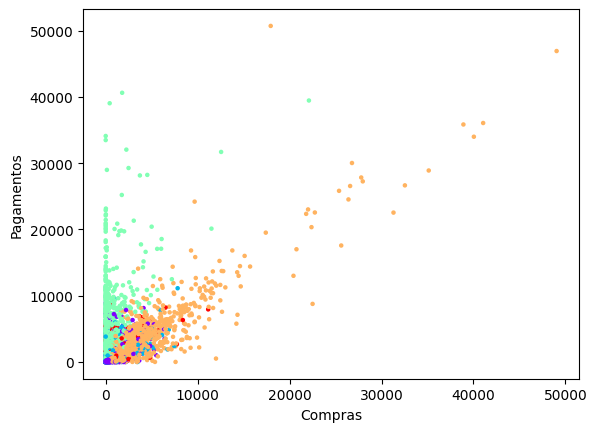

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df["PURCHASES"], df["PAYMENTS"], c=labels, s=5, cmap="rainbow")
plt.xlabel("Compras")
plt.ylabel("Pagamentos")
plt.show()

### Análise dos Clusters - Formato Textual

In [18]:
df["cluster"] = labels
df.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        1074.0  1794.443291  1981.773996   0.000000   507.348768   
3        1536.0  1142.514535  1664.888183   0.000000   212.178230   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.941478   410.126095   9630.367575            3280.0  0.774389   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2        1087.920500  2312.923253  14581.459140            1074.0  0.862388   
3         554.332740  1370.859355  19043.138560            1536.0  0.928220   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... PRC_FULL_PAYMENT       TENURE                                  \
         ...              75%  max   count       mean       std  min   25%   
cluster  ...                                                                 
0        ...         0.444444  1.0  3280.0  11.538110  1.329428  6.0  12.0   
1        ...         0.000000  0.6  2649.0  11.403171  1.481687  6.0  12.0   
2        ...         0.142857  1.0  1074.0  11.520484  1.282926  6.0  12.0   
3        ...         0.545455  1.0  1536.0  11.594401  1.223098  6.0  12.0   
4        ...         0.000000  1.0   411.0  11.790754  0.829347  7.0  12.0   

                           
          50%   75%   max  
cluster                    
0        12.0  12.0  12.0  
1        12.0  12.0  12.0  
2        12.0  12.0  12.0  
3        12.0  12.0  12.0  
4        12.0  12.0  12.0  

[5 rows x 136 columns]

In [24]:
centroids = kmeans.cluster_centers_

max = len(centroids[0])

for i in range(max):
    print(f"{df.columns.values[i]} - {'{:.4f}'.format(centroids[:, i].var())}")

CUST_ID - 0.0224
BALANCE - 0.0000
BALANCE_FREQUENCY - 0.0197
PURCHASES - 0.0076
ONEOFF_PURCHASES - 0.0036
INSTALLMENTS_PURCHASES - 0.0225
CASH_ADVANCE - 0.0000
PURCHASES_FREQUENCY - 0.0000
ONEOFF_PURCHASES_FREQUENCY - 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY - 0.0000
CASH_ADVANCE_FREQUENCY - 0.0000
CASH_ADVANCE_TRX - 0.0000
PURCHASES_TRX - 0.0360
CREDIT_LIMIT - 0.0279
PAYMENTS - 0.0543
MINIMUM_PAYMENTS - 0.0000


In [29]:
description = df.groupby("cluster")[
    "BALANCE",
    "PURCHASES",
    "CASH_ADVANCE",
    "CREDIT_LIMIT",
    "PAYMENTS",
    "PRC_FULL_PAYMENT",
]
n_clients = description.size()
description = description.mean()
description["n_clients"] = n_clients
display(description)

C:\Users\jujun\AppData\Local\Temp\ipykernel_19640\2246329438.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "PRC_FULL_PAYMENT"]


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,n_clients
cluster,,,,,,,
0,443.746756,629.249107,141.482978,5131.197550,814.294226,0.246806,3280
1,3037.962543,385.248630,1636.917210,4495.771989,968.890376,0.001799,2649
2,1794.443291,478.411620,3266.686592,3983.399639,4712.044614,0.117321,1074
3,1142.514535,3274.126719,181.727235,4096.718849,3036.609179,0.278331,1536
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,0.019318,411


### Análise dos Clusters - Interpretação Final

Cluster 0: Clientes com os menores valores em Gastos. Menor valor em Saques. Maior valor de Limite. Bons pagadores. Maior Número de Clientes

Cluster 1: Clientes com os maiores valores em Gastos. Menor valor em Compras. Valor considerável em Saques. Piores pagadores.

Cluster 2: Clientes com os maiores valores em Compras com grande diferença.

Cluster 3: Clientes com os maiores valores em Saques com grande diferença.

Cluster 4: Clientes com os menores valores de Limite. Menor valor de Clientes.